In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model
from tqdm.notebook import tqdm

In [2]:
fig_size_1 = (12, 4)
fig_size_2 = (8, 4)
fig_size_3 = (6, 6)
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

start_date = one_year
end_date = today

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'XLE', 'XLU', 'IVV', 'VNQ', 'VCSH',
           'BABA']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'XOM': 361, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316,
              'XLE': 431, 'XLU': 56, 'IVV': 22, 'VNQ': 118, 'VCSH': 256,
              'BABA': 32,
              'CASH': (69885.14+56138.51+16000)}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'XOM': 41.51, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54,
              'XLE': 30.12, 'XLU': 59.49, 'IVV': 247.73, 'VNQ': 76.10, 'VCSH': 78.07,
              'BABA': 226.33,
              'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'XOM': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock',
              'XLE': 'Sector', 'XLU': 'Sector', 'IVV': 'Index', 'VNQ': 'REIT', 'VCSH': 'Bond',
              'BABA': 'Stock',
              'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tqdm(tickers):
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df = df.append({'Ticker': 'CASH', 'Date' : df['Date'].max() , 'Close' : 1, 'Shares': num_shares['CASH'],
                'Type': asset_type['CASH'], 'Cost': cost_basis['CASH']}, ignore_index=True)

df['Mkt Val'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Mkt Val'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final['Mkt Val %'] = 100*df_final['Mkt Val']/df_final['Mkt Val'].sum()
df_final['Cost Basis %'] = 100*df_final['Cost Basis']/df_final['Cost Basis'].sum()
df_final = df_final.round(2)
df_final.sort_values(by='Mkt Val %', ascending=False)

  0%|          | 0/17 [00:00<?, ?it/s]

,Date,Close,Shares,Type,Cost,Mkt Val,Cost Basis,Change,Change %,Mkt Val %,Cost Basis %
Ticker,,,,,,,,,,,
CASH,2021-05-07,1.00,142023.65,Cash,1.00,142023.65,142023.65,0.00,0.00,30.88,44.47
AMZN,2021-05-07,3291.61,17.00,Stock,1708.54,55957.37,29045.18,26912.19,92.66,12.17,9.10
AAPL,2021-05-07,130.21,208.00,Stock,45.57,27083.68,9478.56,17605.12,185.74,5.89,2.97
UBER,2021-05-07,47.03,554.00,Stock,21.65,26054.62,11994.10,14060.52,117.23,5.67,3.76
FB,2021-05-07,319.08,74.00,Stock,168.62,23611.92,12477.88,11134.04,89.23,5.13,3.91
GOOGL,2021-05-07,2351.93,10.00,Stock,1110.79,23519.30,11107.90,12411.40,111.73,5.11,3.48
XLE,2021-05-07,53.63,431.00,Sector,30.12,23114.53,12981.72,10132.81,78.05,5.03,4.07
XOM,2021-05-07,62.43,361.00,Stock,41.51,22537.23,14985.11,7552.12,50.40,4.90,4.69
MSFT,2021-05-07,252.46,87.00,Stock,95.20,21964.02,8282.40,13681.62,165.19,4.78,2.59


<AxesSubplot:title={'center':'Change'}, xlabel='Ticker'>

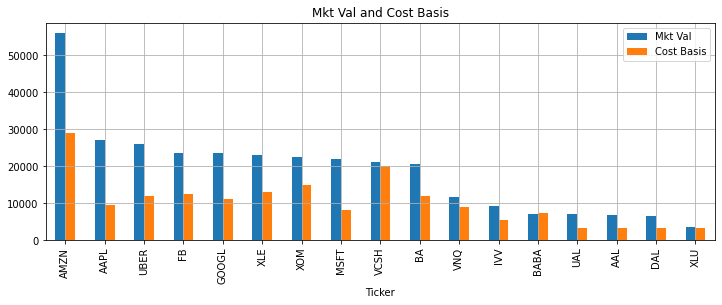

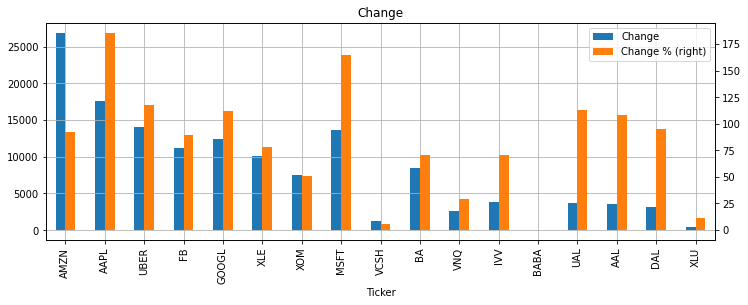

In [5]:
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Mkt Val', 'Cost Basis'],
    kind='bar', figsize=fig_size_1, grid=True,
    title='Mkt Val and Cost Basis')
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Change', 'Change %'], secondary_y='Change %',
    kind='bar', figsize=fig_size_1, grid=True,
    title='Change')

In [6]:
df_final_type = df_final.groupby('Type').sum()[['Mkt Val', 'Cost Basis']]
df_final_type['Mkt Val %'] = 100*df_final_type['Mkt Val']/df_final_type['Mkt Val'].sum()
df_final_type['Cost Basis %'] = 100*df_final_type['Cost Basis']/df_final_type['Cost Basis'].sum()
df_final_type['Change'] = df_final_type['Mkt Val'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type = df_final_type.round(2)
df_final_type

,Mkt Val,Cost Basis,Mkt Val %,Cost Basis %,Change,Change %
Type,,,,,,
Bond,21181.44,19985.92,4.61,6.26,1195.52,5.98
Cash,142023.65,142023.65,30.88,44.47,0.00,0.00
Index,9322.06,5450.06,2.03,1.71,3872.00,71.05
REIT,11615.92,8979.80,2.53,2.81,2636.12,29.36
Sector,26812.77,16313.16,5.83,5.11,10499.61,64.36
Stock,248937.63,126596.77,54.13,39.64,122340.86,96.64


<AxesSubplot:title={'center':'Change'}, xlabel='Type'>

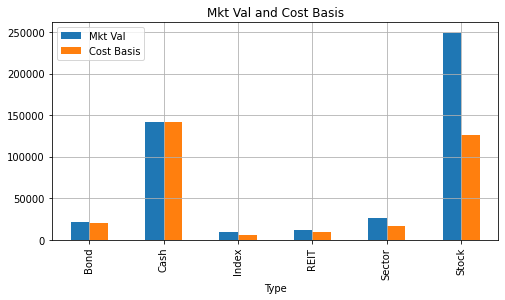

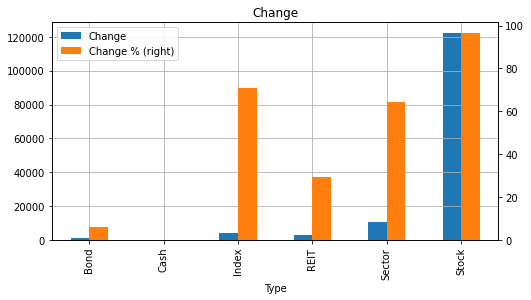

In [7]:
df_final_type.plot(y=['Mkt Val', 'Cost Basis'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Mkt Val and Cost Basis')
df_final_type.plot(y=['Change', 'Change %'], secondary_y=['Change %'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Change')

In [8]:
print('Portfolio value:', round(df_final_type['Mkt Val'].sum(), 2))
print('Cost basis:', round(df_final_type['Cost Basis'].sum(), 2))
print('Change:', round(df_final_type['Change'].sum(), 2))
print('Change %:', round(100*df_final_type['Change'].sum()/df_final_type['Cost Basis'].sum(), 2))

Portfolio value: 459893.47
Cost basis: 319349.36
Change: 140544.11
Change %: 44.01


Chg Portfolio: 2.91
Chg IVV: 8.17
Std dev portfolio 0.731
Std dev IVV 0.843
Beta: 0.529


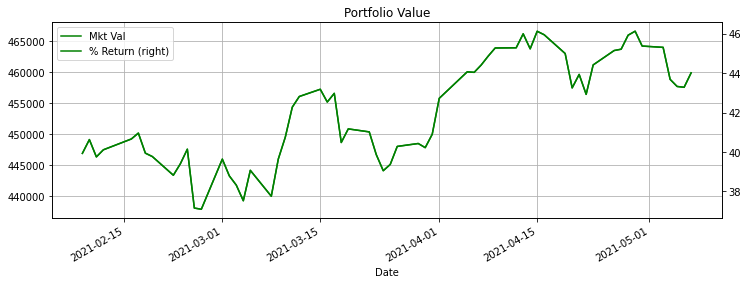

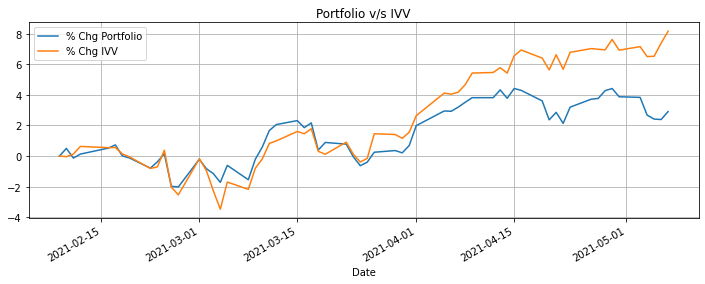

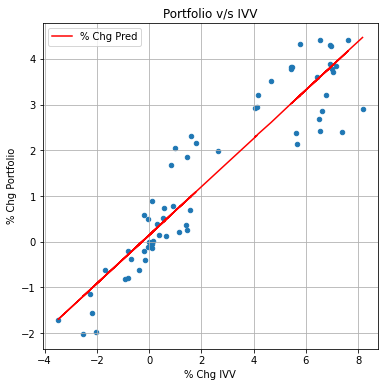

In [9]:
mkt_val = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Mkt Val']) + df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0]
mkt_val = mkt_val.reset_index()

cost_basis = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Cost Basis']) + df[df['Ticker'] == 'CASH'][['Cost Basis']].values[0]
cost_basis = cost_basis.reset_index()

period = three_months

dff = mkt_val[(mkt_val['Date'] >= period) & (mkt_val['Date'] <= end_date)].set_index('Date')
dff['Cost Basis'] = cost_basis[(cost_basis['Date'] >= period) & (cost_basis['Date'] <= end_date)].set_index('Date')['Cost Basis']

dff['Return'] = dff['Mkt Val'] - dff['Cost Basis']
dff['% Return'] = 100*(dff['Mkt Val'] - dff['Cost Basis'])/dff['Cost Basis']
dff['% Chg Portfolio'] = 100*(dff['Mkt Val']-dff.head(1)['Mkt Val'].values[0])/dff.head(1)['Mkt Val'].values[0]
dff['Close IVV'] = df[(df['Ticker'] == 'IVV') & (df['Date'] >= period) & (df['Date'] <= end_date)][['Date', 'Close']].set_index('Date')
dff['% Chg IVV'] = 100*(dff['Close IVV']-dff.head(1)['Close IVV'].values[0])/dff.head(1)['Close IVV'].values[0]

model = linear_model.LinearRegression()
model.fit(np.array(dff[['% Chg IVV']]), np.array(dff[['% Chg Portfolio']]))

dff['% Chg Pred'] = model.predict(np.array(dff[['% Chg IVV']]))
dff = dff.round(2)

dff.plot(y=['Mkt Val', '% Return'], secondary_y='% Return', color=['green', 'green'],
         figsize=fig_size_1, grid=True, title='Portfolio Value')

dff.plot(y=['% Chg Portfolio', '% Chg IVV'], figsize=fig_size_1, grid=True, title='Portfolio v/s IVV')

fig, axes = plt.subplots(sharex=True)
dff.plot(x='% Chg IVV', y='% Chg Portfolio', kind='scatter',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')
dff.plot(x='% Chg IVV', y='% Chg Pred', kind='line', color='Red',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')

print('Chg Portfolio:', dff.tail(1)['% Chg Portfolio'].values[0])
print('Chg IVV:', dff.tail(1)['% Chg IVV'].values[0])

print('Std dev portfolio', round(100*dff.pct_change().std()['Mkt Val'], 3))
print('Std dev IVV', round(100*dff.pct_change().std()['Close IVV'], 3))

print('Beta:', round(model.coef_[0][0], 3))